In [1]:
import pandas as pd 
import numpy as np 

In [2]:
df = pd.read_csv("./full_transformed_diabetic_data.csv")
df.head(10)

,age,time_in_hospital,num_medications,number_diagnoses,insulin,A1Cresult,readmitted
0,0,1,0,0,0,0,0
1,1,3,0,2,3,0,1
2,2,2,0,1,0,0,0
3,3,2,0,2,3,0,0
4,4,1,0,1,2,0,0
5,5,3,0,2,2,0,1
6,6,3,1,2,2,0,0
7,7,4,0,2,0,0,1
8,8,9,1,2,2,0,0
9,9,8,0,2,2,0,0


In [3]:
for col in df:
    print(f"{col}: {len(df[col].unique())}")

age: 10
time_in_hospital: 9
num_medications: 3
number_diagnoses: 6
insulin: 4
A1Cresult: 4
readmitted: 3


In [4]:
# Define the column names and their unique value counts
column_info = {
    'age': 10,
    'time_in_hospital': 9,
    'num_medications': 3,
    'number_diagnoses': 6,
    'insulin': 4,
    'A1Cresult': 4,
    'readmitted': 3
}

# Rename columns with the new naming convention
new_colnames = [f"x{index}_Discrete_{unique_vals}" for index, (col, unique_vals) in enumerate(column_info.items())]

# Assign the new column names to the DataFrame
df.columns = new_colnames

df.head(5)


,x0_Discrete_10,x1_Discrete_9,x2_Discrete_3,x3_Discrete_6,x4_Discrete_4,x5_Discrete_4,x6_Discrete_3
0,0,1,0,0,0,0,0
1,1,3,0,2,3,0,1
2,2,2,0,1,0,0,0
3,3,2,0,2,3,0,0
4,4,1,0,1,2,0,0


In [5]:
# Export training data to a CSV file
df.to_csv('../data/full_masked_transformed_diabetic_data.csv', index=False)

## EXPLORING ORIGINAL

Columns with missing values and their counts:
race                  2273
weight               98569
payer_code           40256
medical_specialty    49949
diag_1                  21
diag_2                 358
diag_3                1423
max_glu_serum        96420
A1Cresult            84748
dtype: int64


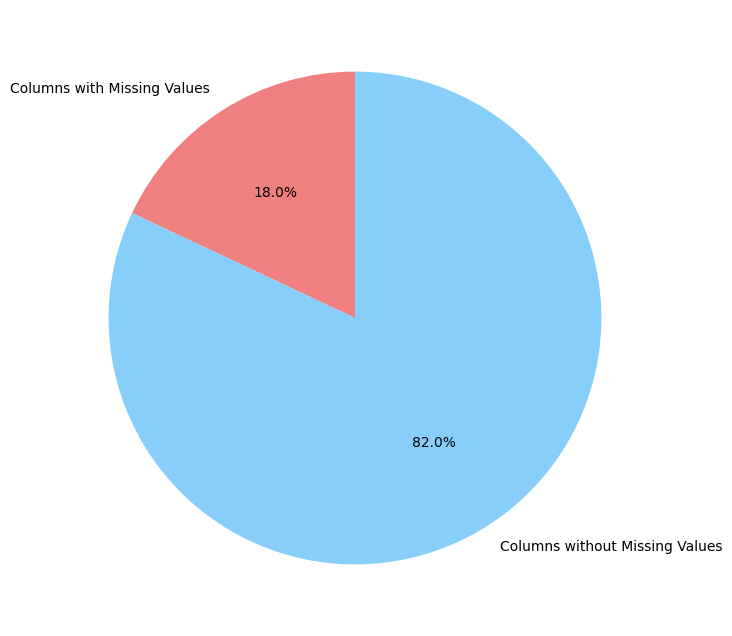

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset and replace '?' with NaN
file_path = "./diabetic_data.csv"
orig_df = pd.read_csv(file_path).replace('?', pd.NA)

# Function to check missingness
missing_cols = orig_df.isnull().sum()

# Determine columns with missing values
cols_with_missing = missing_cols[missing_cols > 0]
num_cols_with_missing = len(cols_with_missing)

# Print columns with missing values and their counts
print("Columns with missing values and their counts:")
print(cols_with_missing)

# Data for the pie chart
data = {
    "Columns with Missing Values": num_cols_with_missing,
    "Columns without Missing Values": orig_df.shape[1] - num_cols_with_missing,
}

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(data.values(), labels=data.keys(), autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightskyblue'])
plt.show()
